In [30]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import natsort

In [36]:
#simulation = 'fiducial'
simulation = 'mkdir_test3'
directory = os.getcwd()+ '/' +simulation + '/'
xip_vector = np.array(()) 
xim_vector = np.array(())
listdir = []

for file in os.listdir(directory):
    if file.startswith("xipm"):
        listdir.append(file)
        
listdir = natsort.natsorted(listdir)        

for file in listdir:
        #print(file)
        data = np.loadtxt(directory+file)
        xip = data[:,1]
        xim = data[:,2]
        xip_vector = np.append(xip_vector, xip)
        xim_vector = np.append(xim_vector, xim) 
                
xipm = np.hstack((xip_vector, xim_vector))
np.savetxt('mu_' + simulation, xipm)
#np.savetxt("mu_omega_0.28", xipm)

In [39]:
os.getcwd()

'/home/andrea/ownCloud2/laptop/CosmoCov/covs/xipm'

In [40]:
data = np.loadtxt("mkdir_test3/xipm_kids_mkdir_test3_0-0.txt")
theta = data[:,0]
xip = data[:,1]
xim = data[:,2]

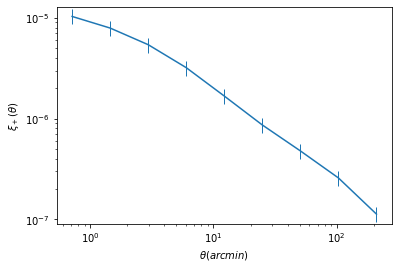

In [11]:
plt.ylabel(r'$\xi_+ (\theta)$')
plt.xlabel(r'$\theta(arcmin)$')
plt.loglog(theta,xip, '-|', markersize=15)

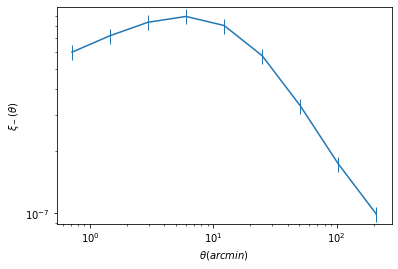

In [12]:
plt.ylabel(r'$\xi_- (\theta)$')
plt.xlabel(r'$\theta(arcmin)$')
plt.loglog(theta,xim,'-|', markersize=15)

In [41]:
theta #FROM DATA VECTOR

array([  0.7133649,   1.452096 ,   2.955825 ,   6.016753 ,  12.24745  ,
        24.93039  ,  50.74726  , 103.299    , 210.2711   ])

In [43]:
#same in radians
theta/180*np.pi/60, 350/180*np.pi/60

(array([0.00020751, 0.0004224 , 0.00085981, 0.0017502 , 0.00356264,
        0.00725196, 0.01476178, 0.03004846, 0.06116538]),
 0.10181087303300256)

THETA FROM COSMOLIKE GIVEN 0.5 AND 300, used in computation of covmat AND in xipm (they are calculated twice but they are the same, checked), but different from t1 and t2. 
*xipm file was added later so probably it didnt have a link to the main code and that's why they calculated the thetas again. This means that the thetas used to compute xipm are different than the ones printed in the files, but maybe they are alright because they are used as well in the covmat. They are not very close to the KiDS ones however:

#### Kids thetas: 
        array([  0.7133649,   1.452096 ,   2.955825 ,   6.016753 ,  12.24745  ,
        24.93039  ,  50.74726  , 103.299    , 210.2711   ])
        
#### Cosmolike thetas (used when computing Legendre polinomial :
        array([  0.49999999,   1.01777897,   2.07174812,   4.21716303, 8.58428058, 
        17.47379869, 35.56892198, 72.40262538, 147.37974494, 299.99999106]) 

It can be obtained from function set_angular_binning() in init.c

#### It seems like cosmolike uses tmin and tmax as center bins because they are plugged in into Legendre polynomials calculations (is this right?), but 0.5 and 300 are edge bins. This may be what makes things wrong. Ironically, the chi-square test is 4 units smaller (278 to 274) when we use this instead of 0.46 and 271.25. Furthermore, trying tmin=0.73 and tmax=210.27 (as Kids first and last bin), works worse, chi-square = 300.  And inputting directly the KiDS array of thetas to the xipm computation makes it also worse, with chi-square = 289.5

### UPDATE: cosmolike uses lower bin boundaries.  
##### (from covariances_real_binned_full_sky_non_limber.c) : The vector called "theta" contains theta_min, the lower bin boundaries. This is used in the bin-average and shot/shape noise computation

Using the centered thetas returns the same values as KiDS, so that is corrected. However the chi-square is worse. Sent email to Xiao asking about different theta calculations.

In [44]:
#for some reason cosmolike uses a vector of 10 components even though Ntheta = 9, and that is the general output
covmat_thetas = np.array([1.454441e-4, 2.960599e-4, 6.026471e-4, 1.226723e-3, 2.497066e-3, 
                 5.082922e-3, 1.034658e-2, 2.106107e-2, 4.287103e-2, 8.726646e-2] )

#np.round(covmat_thetas*180/np.pi*60, 2)
covmat_thetas*180/np.pi*60

array([  0.49999999,   1.01777897,   2.07174812,   4.21716303,
         8.58428058,  17.47379869,  35.56892198,  72.40262538,
       147.37974494, 299.99999106])

THETA FROM COSMOLIKE GIVEN 0.5 AND 300, printed in files (t1 and t2, not used elsewhere)

In [17]:
theta_cosmocov_rad = np.loadtxt("/home/andrea/ownCloud2/laptop/CosmoCov/covs/output/tmax_300_tmin_0.5/order_kids1000_i_0-8")[:,1]
theta_cosmocov_rad*180/np.pi*60
#with 0.46 and 271.25 is the closest to kids

array([  0.78832896,   1.60468931,   3.26643766,   6.6490251 ,
        13.53447092,  27.55020232,  56.08003183, 114.15416305,
       232.36741121])

THETA FROM SIMPLE LOGSPACE DISTRIBUTION IN PYTHON

In [40]:
bin_edges = np.logspace(np.log10(0.5),np.log10(300.0),num=10)

for i in range(9):
    bin_center = (bin_edges[i+1]-bin_edges[i])/2 + bin_edges[i]
    print(bin_center)

0.7588894892666437
1.5447635384109053
3.144455712398635
6.400721846016486
13.02904028462871
26.52136662431692
53.98577886440819
109.89118173588258
223.68986939392477


In [38]:
const = np.log10(theta[3])- np.log10(theta[2])
theta_centre = theta[0]
log_theta_left = np.log10(theta_centre) - const/2
log_theta_right = const + log_theta_left

In [39]:
theta_left = 10**(log_theta_left)
theta_right = 10**(log_theta_right)
print(theta_left, theta_right)

0.4999999998093066 1.0177789614921875


In [ ]:
"""//wrong but maybe useful later (in line 177 of xipm cosmo code)
        /*double logdt_test = (log(271.25)-log(0.46))/like.Ntheta;
		double *theta;
		theta = create_double_vector(0, like.Ntheta-1);
		// vtmin = tmin in radians, same for vtmax and tmax
		for(i=0;i<like.Ntheta ; i++){
		    theta[i] = (exp(log(0.46)+(i+0.0)*logdt_test));
		    printf("theta[%d] = %le\n", i, theta[i]);
		}*/
"""

In [19]:
tmin_center = 0.7588894892666437
tmax_center = 223.68986939392477
ogdt_test = (np.log(tmax_center)-np.log(tmin_center))/9;

theta = np.zeros((9,));

for i in range(9):
    theta[i] = (np.exp(np.log(tmin_center)+(i+0.0)*logdt_test));
    print( i, theta[i]);

0 0.7588894892666437
1 1.541786739776671
2 3.132348496812498
3 6.363790044597695
4 12.928901037969322
5 26.266812839230216
6 53.36458641805143
7 108.41738207828719
8 220.26458979045358
